# The Project
- This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
- Be inquisitive, try out new things.
- Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
- There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.
## The Assignment
Take a ZIP file) of images and process them, using a library built into python that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new (library), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called images.zip. These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use small_img.zip for testing.

Here's an example of the output expected. Using the small_img.zip file, if I search for the string "Christopher" I should see the following image:Christopher SearchIf I were to use the images.zip file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):Mark Search

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [ ]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
# the rest is up to you!

In [ ]:
#Apertura y extraccion
file_zip = 'readonly/images.zip'           
open_zip = zipfile.ZipFile(file_zip, 'r')
list_zip = open_zip.namelist()
open_zip.extractall()
open_zip.close()

In [ ]:
#Diccionario de imagenes grises
image_dict = {}
for image in list_zip:
    image_dict[image] = [Image.open(image)]

In [ ]:
#Reconocimiento de palabras
def image_text(image):
    #Ingreso de imagen PNG y conversion a gris
    image=image.convert("L")
    #Extraccion de texto en la variable image_text
    image_text_extract = pytesseract.image_to_string(image)
    return image_text_extract
#Agregar texto al diccionario de las imagenes
for image in list_zip:
    texto = image_text(image_dict[image][0])
    image_dict[image].append(texto)
#Siguiente paso agregar cada texto_image a cada imagen en el diccionario de imagenes

In [ ]:
#Reconocimiento de rostros
def image_face(image):
    image_cv = cv.imread(image) #apertura de imagen
    image_pil_color = Image.open(image)
    gray = cv.cvtColor(image_cv, cv.COLOR_BGR2GRAY) #cambio a color gris
    faces = face_cascade.detectMultiScale(gray,1.35) #deteccion de rostros, entrega coordenadas
    image_pil = Image.fromarray(gray, mode="L") #conversion a imagen PIL
    image_coord = faces.tolist() #Coodenadas x , y con w y h
    image_list_coord = []
    #Recorte de rostros
    for coord in image_coord:
        image_coord = image_pil_color.crop((coord[0],coord[1],coord[0]+coord[2],coord[1]+coord[3]))
        image_list_coord.append(image_coord)
    return image_list_coord

In [ ]:
#Agregar rostros a diccionario de imagenes
for image in list_zip:
    try:
        face_coord = image_face(image)
        image_dict[image].append(face_coord)
    except:
        image_dict[image].append([])

In [ ]:
# image_dict: key = name_image
# image_dict[image][0] = image.pil
# image_dict[image][1] = texto
# image_dict[image][2] = rostros

In [ ]:
# En la funcion ingresar el nombre de la imagen que proviene de la lista de nombres de imagenes o list_zip
def image_result(image): 
    import PIL
    height = 100
    widht = height
    contact_sheet=PIL.Image.new("RGB", (int(widht * 5),int(height*2)))
    x = 0
    y = 0
    for face in image_dict[image][2]: 
        #toma face de una lista de rostros extraidas del archivo image en el diccionario de imagenes
        factor = face.width / face.height
        face = face.resize((int(height * factor) ,int(height)))
        contact_sheet.paste(face, (x,y))
        if x + face.width >= contact_sheet.width:
            x = 0
            y = y + face.height
        else:
            x = x + face.width
    print("Results found in file {}".format(image))
    display(contact_sheet)

In [ ]:
def text_in_image(text_search):
    for image in list_zip:
        if len(image_dict[image][2]) == 0:
            print("Results found in file {}".format(image))
            print("But there were no faces in that file!")
        else: 
            if text_search in image_dict[image][1]:
                image_result(image)

In [ ]:
text_in_image("Christopher")

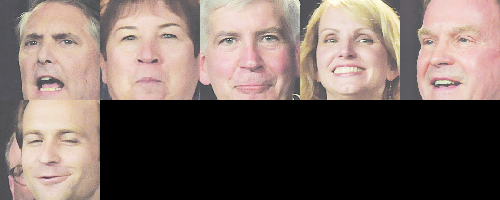

- Results found in file a-10.png
- But there were no faces in that file!
- Results found in file a-11.png
- But there were no faces in that file!
- Results found in file a-12.png
- But there were no faces in that file!
- Results found in file a-3.png

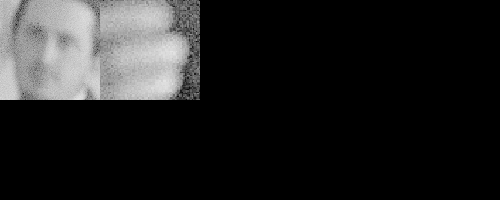

- Results found in file a-4.png
- But there were no faces in that file!
- Results found in file a-7.png
- But there were no faces in that file!

In [ ]:
text_in_image("Mark")

- Results found in file a-0.png

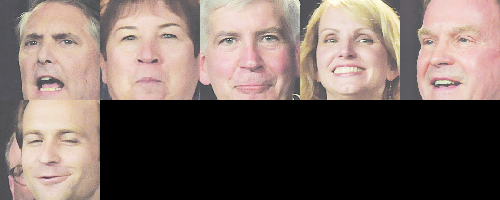

- Results found in file a-1.png

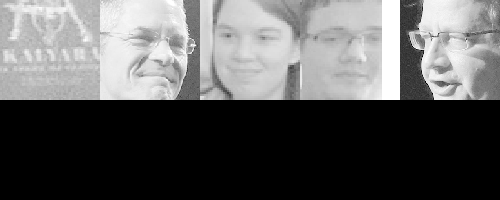

- Results found in file a-10.png
- But there were no faces in that file!
- Results found in file a-11.png
- But there were no faces in that file!
- Results found in file a-12.png
- But there were no faces in that file!
- Results found in file a-13.png

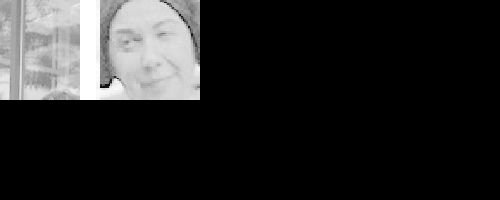
- Results found in file a-2.png

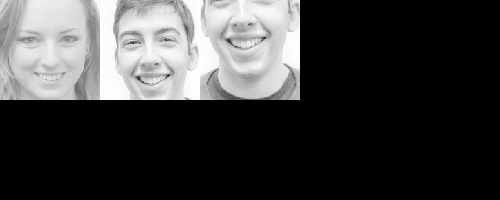
- Results found in file a-3.png

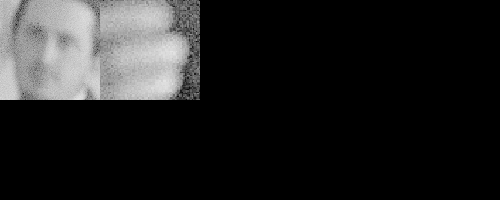
- Results found in file a-4.png
- But there were no faces in that file!
- Results found in file a-7.png
- But there were no faces in that file!
- Results found in file a-8.png

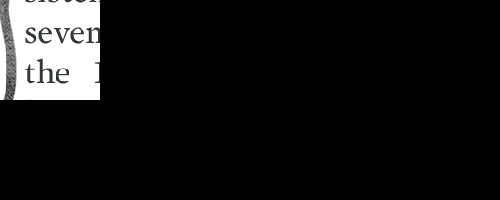
